# Урок 8. Работа с данными

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.isotonic import spearmanr
from scipy import stats

### 2. Загрузите датасет в pandas DataFrame под названием df.

In [225]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Выполните предварительную обработку данных, выполнив следующие шаги: 

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 

b. Проверьте и обработайте любые дублирующиеся строки в датасете. 

c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [227]:
df.isnull().sum()[df.isnull().sum() != 0] # Столбцы, содержащие нулевые значения с их поличеством

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [228]:
null_col = df.isnull().sum()[df.isnull().sum() != 0]/len(df) # В относительном виде
null_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [229]:
df2 = null_col[null_col > 0.5] # Колонки с отстутствием более половины значений
df2

Alley          0.937671
MasVnrType     0.597260
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [230]:
df_new = df.drop(df2.index, axis=1) # Удаляем их
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [231]:
num_col = df.select_dtypes(include = [np.number]) # Столбцы с цифровыми значениями среди содержащих нули
null_num_col = num_col.columns[num_col.isnull().any()]
null_num_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [232]:
obj_col = df.select_dtypes(include = ['object']) #  Посмотрим для контроля на аналогичные столбцы со строковыми значениями
null_obj_col = obj_col.columns[obj_col.isnull().any()]
null_obj_col

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

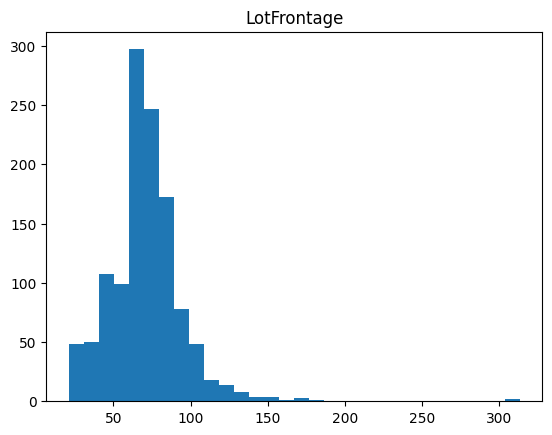

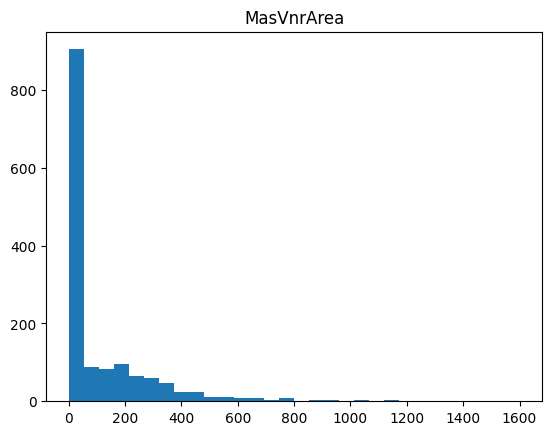

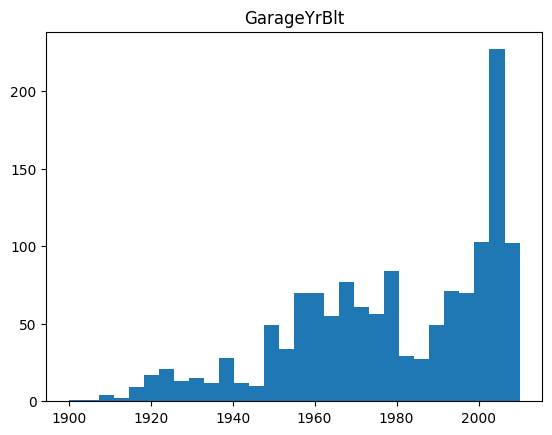

In [233]:
for col in null_num_col: # Посмотрим визуально на распределение значений в наших нулевых столбцах
    fig, ax = plt.subplots() 
    ax.hist(df[col], bins=30)
    ax.set_title(f"{col}")
    plt.show()
    plt.close(fig)

In [234]:
for col in null_num_col: # Распределение не симметричное, заменим значения на медиану
    df_new[col] = df_new[col].fillna(df_new[col].median())

In [235]:
df_new= df_new.fillna('None') # Честно говоря не сильно есть желание глубоко погружаться в датасет, учитывая количество столбцов, поэтому остальные строковые значения, которых нет заменим на None, для корректной фильтрации в дальнейшем

In [236]:
df_new.isnull().sum()[df_new.isnull().sum() != 0] # Проверим на нулевые значения полученный датафрейм

Series([], dtype: int64)

In [237]:
df_new[df_new.duplicated()] # Полных дубликатов нет

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [238]:
df_new[df_new['Id'].duplicated()] # Дубликатов по Id нет

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [239]:
df3 = df[df.notna().any(axis=1)] # Поочередно просмотрим данные в колонках и информацию о их типах. Смотрим на оригинальных данных во избежание ошибок в преобразованиях
df3.iloc[:, :20].head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [240]:
df3.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [241]:
df3 = df[df.notna().any(axis=1)] # Поочередно просмотрим данные в колонках и информацию о их типах
df3.iloc[:, 20:40].head(5)

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


In [242]:
df3.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   RoofStyle     1460 non-null   object 
 2   RoofMatl      1460 non-null   object 
 3   Exterior1st   1460 non-null   object 
 4   Exterior2nd   1460 non-null   object 
 5   MasVnrType    588 non-null    object 
 6   MasVnrArea    1452 non-null   float64
 7   ExterQual     1460 non-null   object 
 8   ExterCond     1460 non-null   object 
 9   Foundation    1460 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  BsmtCond      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtFinSF1    1460 non-null   int64  
 15  BsmtFinType2  1422 non-null   object 
 16  BsmtFinSF2    1460 non-null   int64  
 17  BsmtUnfSF     1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [243]:
df3 = df[df.notna().any(axis=1)] # Поочередно просмотрим данные в колонках и информацию о их типах
df3.iloc[:, 40:60].head(5)

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [244]:
df3.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HeatingQC     1460 non-null   object 
 1   CentralAir    1460 non-null   object 
 2   Electrical    1459 non-null   object 
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   LowQualFinSF  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtFullBath  1460 non-null   int64  
 8   BsmtHalfBath  1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   int64  
 12  KitchenAbvGr  1460 non-null   int64  
 13  KitchenQual   1460 non-null   object 
 14  TotRmsAbvGrd  1460 non-null   int64  
 15  Functional    1460 non-null   object 
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   770 non-null    object 
 18  GarageType    1379 non-null 

In [245]:
df3 = df[df.notna().any(axis=1)] # Поочередно просмотрим данные в колонках и информацию о их типах
df3.iloc[:, 60:80].head(5)

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [246]:
df3.iloc[:, 60:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageFinish   1379 non-null   object
 1   GarageCars     1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   GarageQual     1379 non-null   object
 4   GarageCond     1379 non-null   object
 5   PavedDrive     1460 non-null   object
 6   WoodDeckSF     1460 non-null   int64 
 7   OpenPorchSF    1460 non-null   int64 
 8   EnclosedPorch  1460 non-null   int64 
 9   3SsnPorch      1460 non-null   int64 
 10  ScreenPorch    1460 non-null   int64 
 11  PoolArea       1460 non-null   int64 
 12  PoolQC         7 non-null      object
 13  Fence          281 non-null    object
 14  MiscFeature    54 non-null     object
 15  MiscVal        1460 non-null   int64 
 16  MoSold         1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SaleType       1460 non-null

In [247]:
df3 = df[df.notna().any(axis=1)] # Поочередно просмотрим данные в колонках и информацию о их типах
df3.iloc[:, 80:].head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [248]:
df3.iloc[:, 80:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [249]:
df_new['GarageYrBlt'] = df_new['GarageYrBlt'].astype(int) # Изменим тип столбца с годами на целочисленный

### 4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 

a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [250]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [251]:
z = np.abs(stats.zscore(df['SalePrice']))
df['SalePrice'][z > 3] # Проверяем на выбросы для z-score равному 3

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64

c:\Users\spite\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


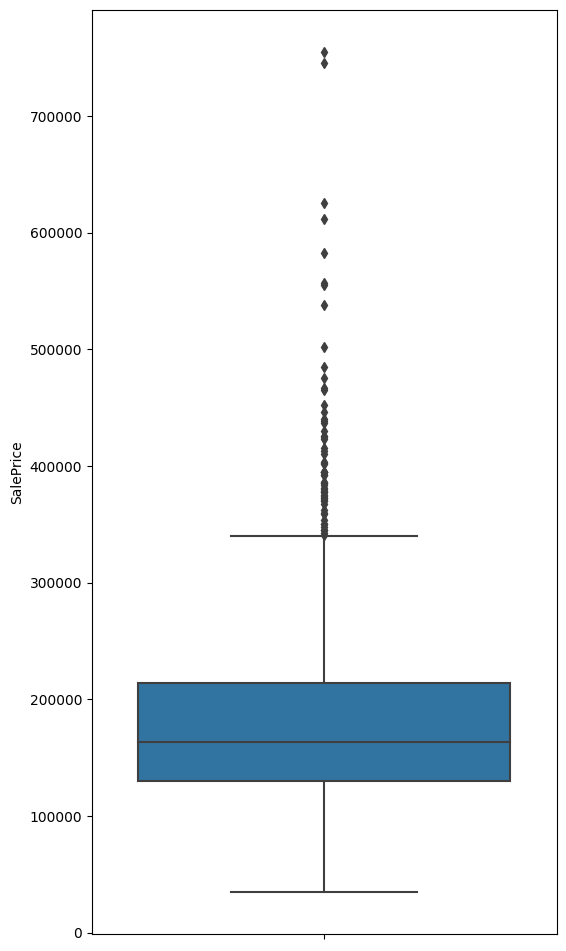

In [252]:
plt.figure(figsize=(6, 12)) 
sns.boxplot(data=df, y='SalePrice') #Посмотрим на выбросы визуально
plt.show()

In [253]:
stats.shapiro(df['SalePrice']) #Проверяем на нормальность распределения тестом Шапиро-Уилка (p-value мал, распределение не нормальное)

ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)

In [254]:
variable = 'SalePrice'
# Выбираем только переменные с числами
quantitative_vars = df_new.select_dtypes(include=[np.number])
results = {}

for col in quantitative_vars.columns:
    if col != variable:
        # Для каждой колонки рассчитываем коэффициент корреляции Спирмена 
        spearman_corr, p_value = spearmanr(df_new[variable], df_new[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

results_df[results_df['p_value']> 0.05] # Показатели у которых есть корреляция со столбцом SalePrice

,Spearman_corr,p_value
Id,-0.018546,0.478895
MSSubClass,0.007192,0.783636
BsmtFinSF2,-0.038806,0.138322
BsmtHalfBath,-0.012189,0.641677
YrSold,-0.029899,0.253570


In [255]:
df_new[['OverallQual', 'GrLivArea', 'GarageCars']].describe() # Упомянутые характеристики в задании

,OverallQual,GrLivArea,GarageCars
count,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123
std,1.382997,525.480383,0.747315
min,1.000000,334.000000,0.000000
25%,5.000000,1129.500000,1.000000
50%,6.000000,1464.000000,2.000000
75%,7.000000,1776.750000,2.000000
max,10.000000,5642.000000,4.000000


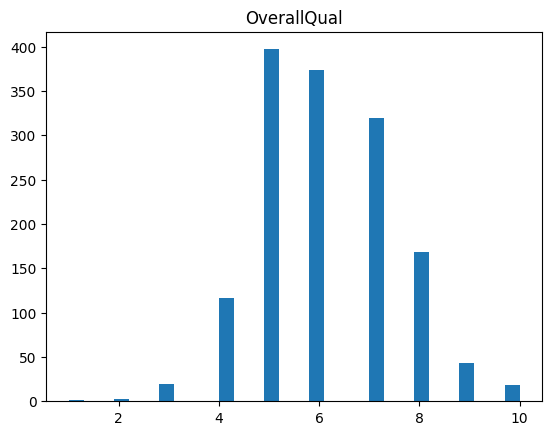

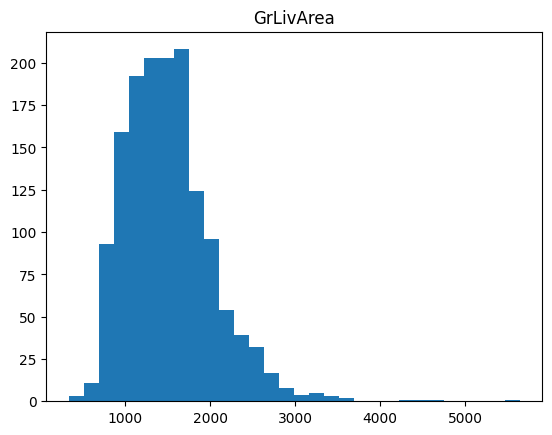

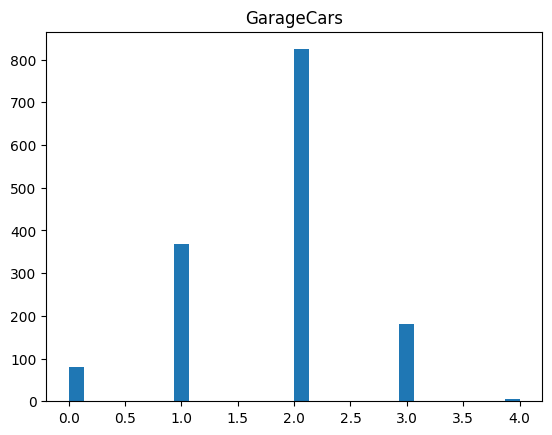

In [256]:
for col in df_new[['OverallQual', 'GrLivArea', 'GarageCars']]: # Посмотрим визуально наши столбцы с характеристиками
    fig, ax = plt.subplots() 
    ax.hist(df[col], bins=30)
    ax.set_title(f"{col}")
    plt.show()
    plt.close(fig)

In [257]:
variable = 'OverallQual'
# Выбираем только переменные с числами
quantitative_vars = df_new.select_dtypes(include=[np.number])
results = {}

for col in quantitative_vars.columns:
    if col != variable:
        # Для каждой колонки рассчитываем коэффициент корреляции Спирмена 
        spearman_corr, p_value = spearmanr(df_new[variable], df_new[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

results_df[results_df['p_value']> 0.05] # Показатели у которых есть корреляция со столбцом OverallQual

,Spearman_corr,p_value
Id,-0.028771,0.271933
LowQualFinSF,-0.034029,0.193765
BsmtHalfBath,-0.050598,0.053244
3SsnPorch,0.032903,0.208944
ScreenPorch,0.046335,0.076745
YrSold,-0.025464,0.330892


In [258]:
variable = 'GrLivArea'
# Выбираем только переменные с числами
quantitative_vars = df_new.select_dtypes(include=[np.number])
results = {}

for col in quantitative_vars.columns:
    if col != variable:
        # Для каждой колонки рассчитываем коэффициент корреляции Спирмена 
        spearman_corr, p_value = spearmanr(df_new[variable], df_new[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

results_df[results_df['p_value']> 0.05] # Показатели у которых есть корреляция со столбцом GrLivArea

,Spearman_corr,p_value
Id,0.002812,0.914493
BsmtFullBath,0.008980,0.731732
BsmtHalfBath,-0.026839,0.305444
EnclosedPorch,-0.049057,0.060932
3SsnPorch,0.033912,0.195307
MiscVal,-0.048969,0.061400
YrSold,-0.026256,0.316068


In [259]:
variable = 'GarageCars'
# Выбираем только переменные с числами
quantitative_vars = df_new.select_dtypes(include=[np.number])
results = {}

for col in quantitative_vars.columns:
    if col != variable:
        # Для каждой колонки рассчитываем коэффициент корреляции Спирмена 
        spearman_corr, p_value = spearmanr(df_new[variable], df_new[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

results_df[results_df['p_value']> 0.05] # Показатели у которых есть корреляция со столбцом GarageCars

,Spearman_corr,p_value
Id,0.013301,0.611590
MSSubClass,0.024226,0.354954
BsmtHalfBath,-0.029322,0.262846
KitchenAbvGr,-0.028503,0.276419
3SsnPorch,0.035538,0.174723
ScreenPorch,0.025837,0.323855
PoolArea,0.021783,0.405573
MoSold,0.040261,0.124131
YrSold,-0.039178,0.134582


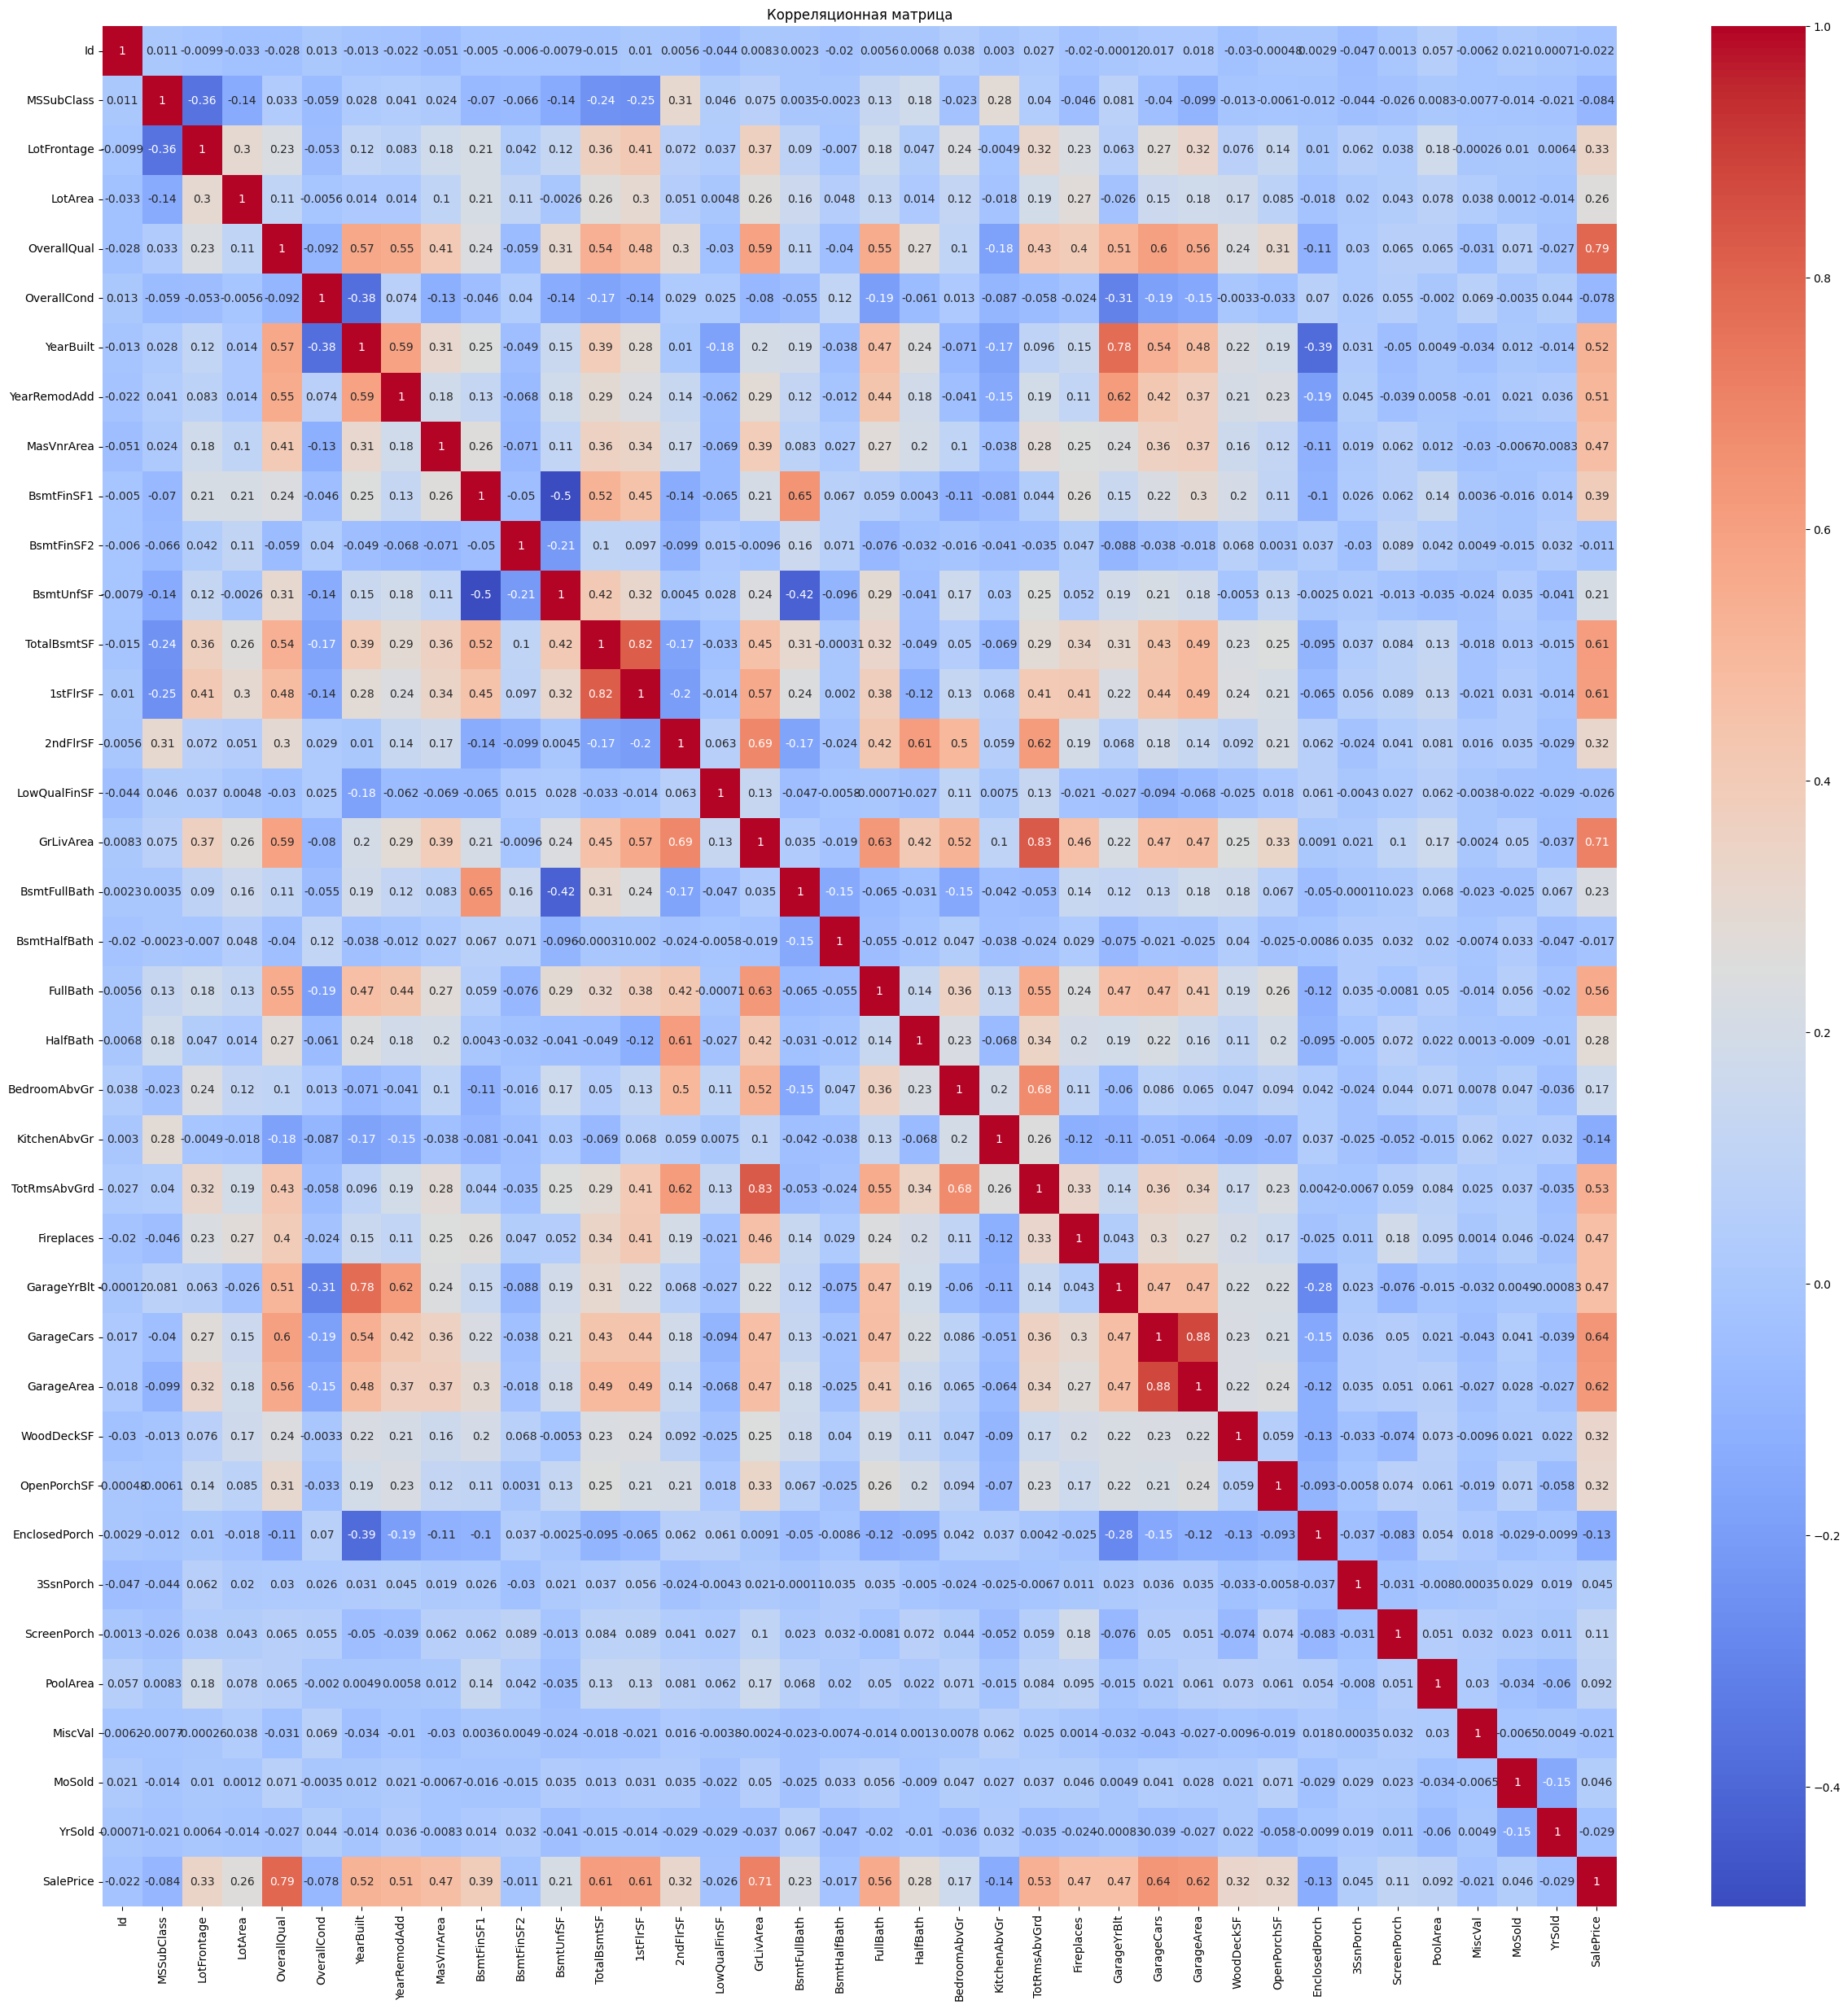

In [260]:

numeric_df = df_new.select_dtypes(include=[np.number])
plt.figure(figsize=(30, 30))
correlation_matrix = numeric_df.corr()

# Визуализируем корреляционную матрицу
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### 5. Выполните проектирование признаков путем реализации следующих преобразований: 

a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [261]:
df_new['LotShape'].value_counts() # Для one-hot преобразования выберем следующий признак

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [262]:
df_onehot = pd.get_dummies(df_new, columns=['LotShape'])
df_onehot.iloc[:, 75:]

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,False,False,False,True
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
1455,False,False,False,True
1456,False,False,False,True
1457,False,False,False,True
1458,False,False,False,True


In [263]:
df_new['CentralAir'].value_counts() # Для lable encoding преобразования выберем следующий признак

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [264]:
le = LabelEncoder()
df_onehot['CentralAir'] = le.fit_transform(df_onehot['CentralAir'].astype(str))
df_onehot['CentralAir'].value_counts()

CentralAir
1    1365
0      95
Name: count, dtype: int64

### 6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'

In [265]:
df_onehot.to_csv('cleaned_house_prices.csv', index='False')